In [1]:
import pandas as pd
import numpy as np
import spacy, nltk, gensim, sklearn
import re
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import os

In [2]:
# Load english data
DATA_PATH = '../Data/language_split/data_en.csv'
df = pd.read_csv(DATA_PATH)
df.drop(columns='new_ID', inplace=True)

# Load NLP
nlp = spacy.load('en_core_web_sm')

In [3]:
def nlp_get_tokens(df, column):
    '''Return the dataframe df with the 'column' (df['column']) cleaned
    
    input 1: df / type panda dataframe
    input 2: column / type string
    output : df / type dataframe
    '''
    # Apply nlp()
    if column == 'content':
        col_name_input = column + '_no_custom_words'
    elif column == 'title':
        col_name_input = column
    else:
        raise(Error)
        
    col_name_nlp = column + '_nlp'
    col_name_tokens = column + '_tokens'
    # Apply nlp()
    df.loc[:, col_name_nlp] = df.loc[:,col_name_input].apply(lambda x: nlp(x.lower()))
    
    # Split string into tokens
    df.loc[:,col_name_tokens] = ''
    for idx in df.index:
        # Remove stop words and punctuation
        df.at[idx,col_name_tokens] = [token.lemma_ for token in df.loc[idx,col_name_nlp] if token.is_stop != True and token.is_punct != True and token.is_space != True and len(token) > 2]
    return df

# Apply cleaning to whole dataset

In [4]:
# Remove custom expression and lower case the row
df.loc[:,'content_no_custom_words'] = df.loc[:,'content_no_URL'].apply(lambda x: re.sub('posted on .*? friend \| \/content\/findjobs\/job-details\/editsendjobtofriend\.xml\?id=\d+&__version=\d .*? function| job reference: .*? location:| be the firstto| apply for this job \| .*| « back to results.*| share.php.*| tl_files.*?pdf|\S*@\S*\s?|(\+|0)[\d ]{8,16}', ' ', x.lower())).str.lower()

# Remove any number in the 'title'
df.loc[:, 'title'] = df.loc[:, 'title'].apply(lambda x: re.sub('\d+\s|\s\d+\s|\s\d+',' ', x))
                                            
df = nlp_get_tokens(df,'title')
df = nlp_get_tokens(df,'content')
df

,title,content,content_no_java,content_no_URL,language,content_no_custom_words,title_nlp,title_tokens,content_nlp,content_tokens
0,Betriebsmitarbeiter/in,Betriebsmitarbeiter/in\n\r\nBetriebsmitarbeite...,Betriebsmitarbeiter/in\n\r\nBetriebsmitarbeite...,Betriebsmitarbeiter/in Betriebsmitarbeiter/i...,en,betriebsmitarbeiter/in betriebsmitarbeiter/i...,"(betriebsmitarbeiter, /, in)",[betriebsmitarbeiter],"(betriebsmitarbeiter, /, in, , betriebsmitar...","[betriebsmitarbeiter, betriebsmitarbeiter, rec..."
1,Infirmière Camp d'été,<h2>Responsibilities:</h2>\n<p>Provides health...,Responsibilities:\nProvides health care and as...,Responsibilities: Provides health care and ass...,en,responsibilities: provides health care and ass...,"(infirmière, camp, d'été)","[infirmière, camp, d'été]","(responsibilities, :, provides, health, care, ...","[responsibility, provide, health, care, assist..."
2,Customer Service Industrialisation Manager (m/w),Work with us\n\nWhat matters most to us? High ...,Work with us\n\nWhat matters most to us? High ...,Work with us What matters most to us? High le...,en,work with us what matters most to us? high le...,"(customer, service, industrialisation, manager...","[customer, service, industrialisation, manager]","(work, with, us, , what, matters, most, to, u...","[work, matter, high, level, team, performance,..."
3,HR-Manager with particular focus on change-man...,The requirement for this job are as follows: -...,The requirement for this job are as follows: -...,The requirement for this job are as follows: -...,en,the requirement for this job are as follows: -...,"(hr, -, manager, with, particular, focus, on, ...","[manager, particular, focus, change, managemen...","(the, requirement, for, this, job, are, as, fo...","[requirement, job, follow, commercial, educati..."
4,Java Backend Developer - Business Rule Develop...,QualifikationenAufgaben\n<ul>\n <li>Several ye...,QualifikationenAufgaben\n\nSeveral years’ expe...,QualifikationenAufgaben Several years’ experi...,en,qualifikationenaufgaben several years’ experi...,"(java, backend, developer, -, business, rule, ...","[java, backend, developer, business, rule, dev...","(qualifikationenaufgaben, , several, years, ’...","[qualifikationenaufgaben, year, experience, ja..."
...,...,...,...,...,...,...,...,...,...,...
31141,Bauwerktrenner / Bohr- und Schneidspezialist,Bauwerktrenner / Bohr- und Schneidspezialist\n...,Bauwerktrenner / Bohr- und Schneidspezialist\n...,Bauwerktrenner / Bohr- und Schneidspezialist ...,en,bauwerktrenner / bohr- und schneidspezialist ...,"(bauwerktrenner, /, bohr-, und, schneidspezial...","[bauwerktrenner, bohr-, und, schneidspezialist]","(bauwerktrenner, /, bohr-, und, schneidspezial...","[bauwerktrenner, bohr-, und, schneidspezialist..."
31142,Digital Planner (m/f) Boomerang (now part of A...,<h2>Originals wanted!<strong></strong></h2>\n<...,Originals wanted!\nThere’s one thing in partic...,Originals wanted! There’s one thing in particu...,en,originals wanted! there’s one thing in particu...,"(digital, planner, (, m, /, f, ), boomerang, (...","[digital, planner, boomerang, accenture]","(originals, wanted, !, there, ’s, one, thing, ...","[original, want, thing, particular, wish, digi..."
31143,Zimmermann/in,Zimmermann/in\n\r\nZimmermann/in\r\n \r\nZimme...,Zimmermann/in\n\r\nZimmermann/in\r\n \r\nZimme...,Zimmermann/in Zimmermann/in Zimmermann i...,en,zimmermann/in zimmermann/in zimmermann i...,"(zimmermann, /, in)",[zimmermann],"(zimmermann, /, in, , zimmermann, /, in, ...","[zimmermann, zimmermann, zimmermann, bern, car..."
31144,Brand Manager Oncology - Pharmaceutical World ...,Brand Manager Oncology - Pharmaceutical World ...,Brand Manager Oncology - Pharmaceutical World ...,Brand Manager Oncology - Pharmaceutical World ...,en,brand manager oncology - pharmaceutical world ...,"(brand, manager, oncology, -, pharmaceutical, ...","[brand, manager, oncology, pharmaceutical, wor...","(brand, manager, oncology, -, pharmaceutical, ...","[bra

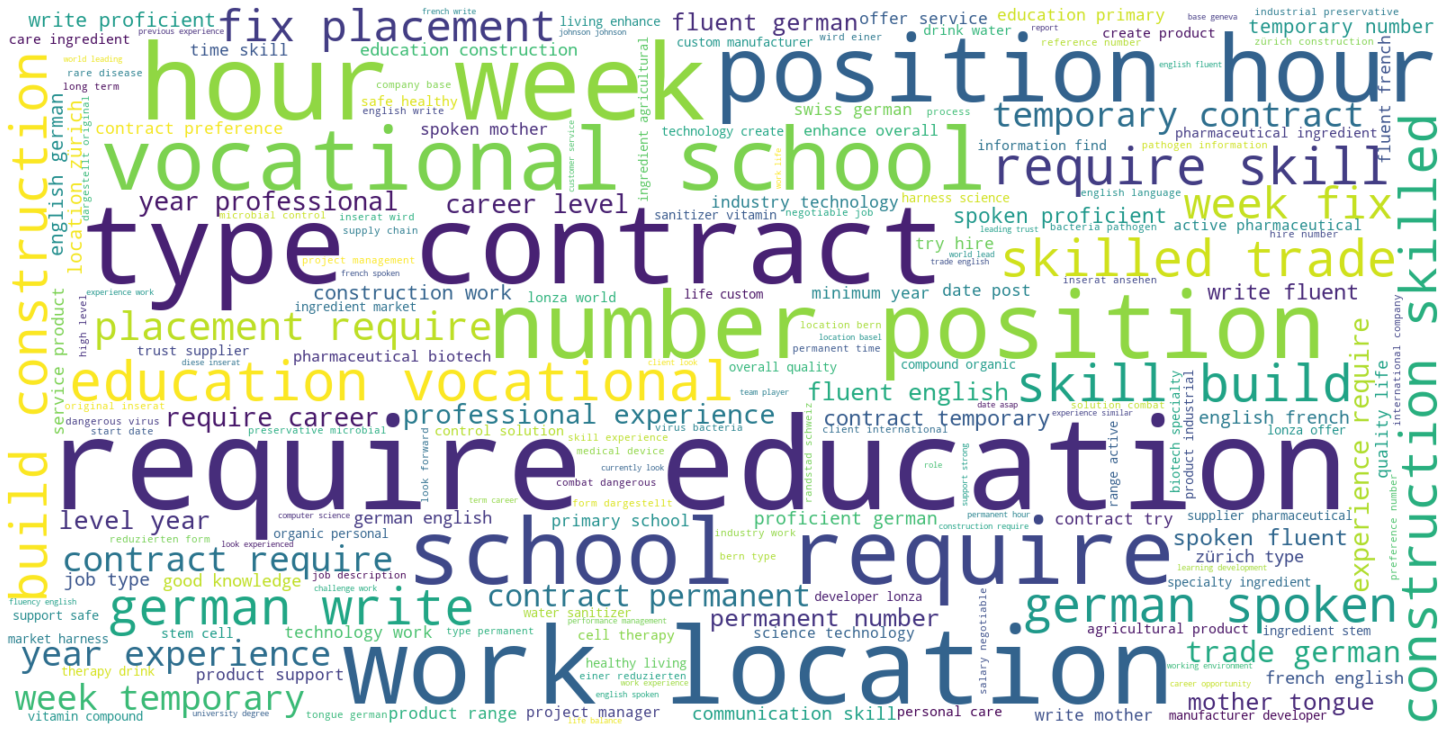

In [5]:
# Join the tokens of 'content' for plotting word cloud
common_words = [" ".join(df.loc[id,'content_tokens']) for id in df.index]
common_words = " ".join(common_words)

# Plot the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(common_words)

plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

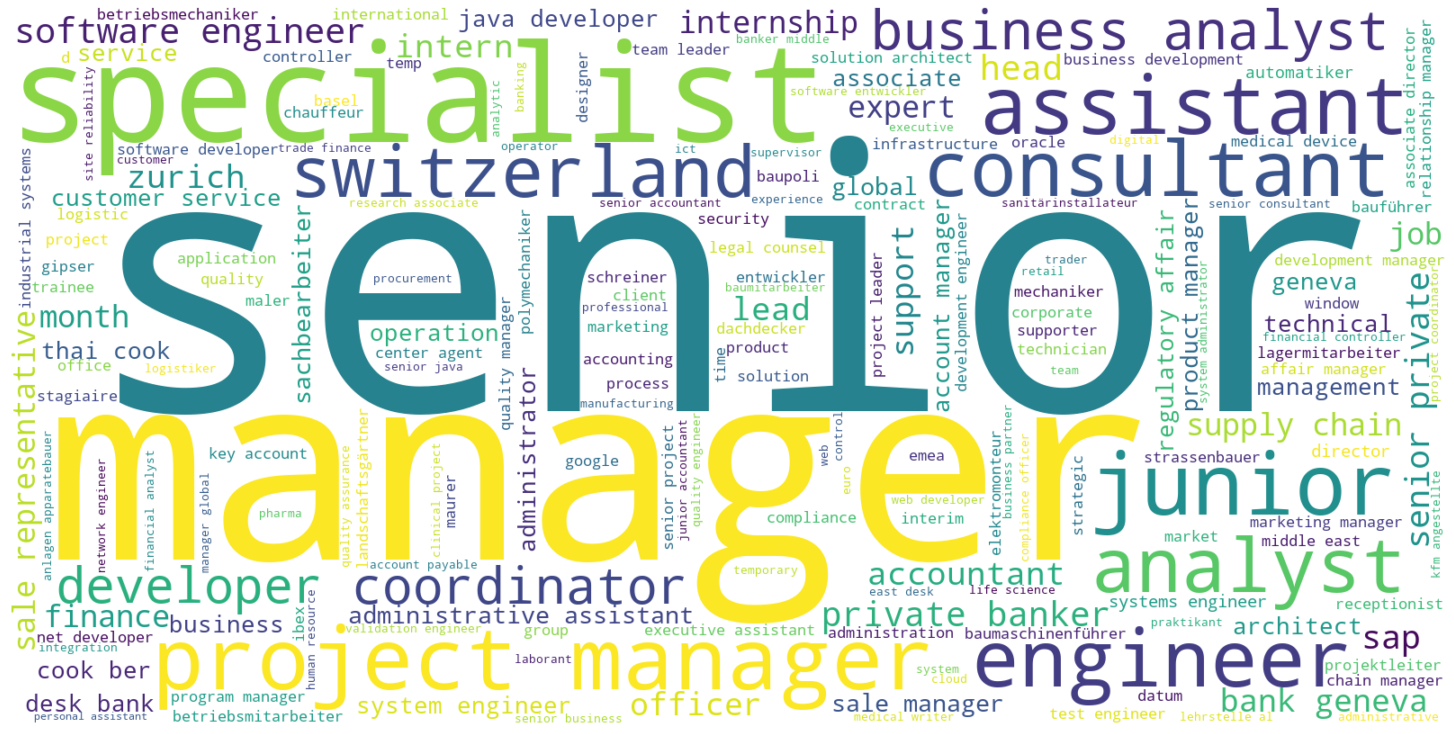

In [6]:
# Join the tokens of 'title' for plotting word cloud
common_words = [" ".join(df.loc[id,'title_tokens']) for id in df.index]
common_words = " ".join(common_words)

# Plot the word cloud
wordcloud = WordCloud(width=1600, height=800, background_color="white").generate(common_words)

plt.figure(figsize=(20,10), facecolor='w')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [7]:
os.mkdir('../Data/cleaned')
df.to_csv('../Data/cleaned/data_en_clean.csv', index=False)